<a href="https://colab.research.google.com/github/Mahabubjamil/ColabNotebook/blob/main/Tweeter_Sentiment_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk


In [2]:
df = pd.read_csv('/content/train.csv')

In [3]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df['tweet'].values[0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [5]:
print(df.shape)


(31962, 3)


In [6]:
print(df.shape)

(31962, 3)


**Quick EDA**

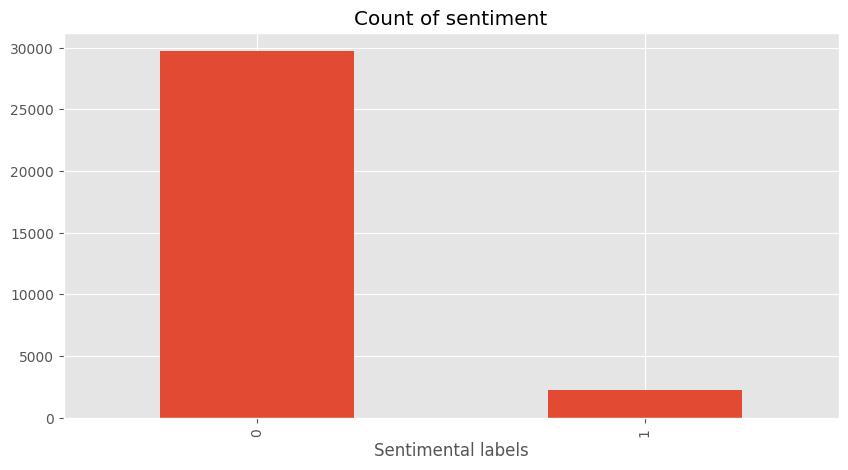

In [7]:
ax = df['label'].value_counts().sort_index().plot(kind='bar', title='Count of sentiment',figsize=(10,5))
ax.set_xlabel('Sentimental labels')
plt.show()

***Basic NLTK***

In [8]:
example = df['tweet'][50]
print(example)

#abc2020 getting ready 2 remove the victums frm #pulseclub #prayfororlando  


In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['#',
 'abc2020',
 'getting',
 'ready',
 '2',
 'remove',
 'the',
 'victums',
 'frm',
 '#']

In [11]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [12]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('#', '#'),
 ('abc2020', 'NN'),
 ('getting', 'VBG'),
 ('ready', 'JJ'),
 ('2', 'CD'),
 ('remove', 'VB'),
 ('the', 'DT'),
 ('victums', 'NNS'),
 ('frm', 'RB'),
 ('#', '#')]

In [13]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [14]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  #/#
  abc2020/NN
  getting/VBG
  ready/JJ
  2/CD
  remove/VB
  the/DT
  victums/NNS
  frm/RB
  #/#
  pulseclub/JJ
  #/#
  prayfororlando/NN)


***VADER Sentiment Analysis***

In [15]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [17]:
sia

In [18]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [19]:
sia.polarity_scores('This is the worst things ever!')

{'neg': 0.468, 'neu': 0.532, 'pos': 0.0, 'compound': -0.6588}

In [20]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.3612}

In [22]:
#Running the polarity scores in entire datasets
res = {}
for i, row in tqdm(df.iterrows(),total=len(df)):
  text = row['tweet']
  myid = row['id']
  res[myid]=sia.polarity_scores(text)

  0%|          | 0/31962 [00:00<?, ?it/s]

In [23]:
res

{1: {'neg': 0.385, 'neu': 0.615, 'pos': 0.0, 'compound': -0.8296},
 2: {'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'compound': 0.6705},
 3: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 4: {'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'compound': 0.7249},
 5: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 6: {'neg': 0.323, 'neu': 0.5, 'pos': 0.177, 'compound': -0.4215},
 7: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 8: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 9: {'neg': 0.0, 'neu': 0.498, 'pos': 0.502, 'compound': 0.877},
 10: {'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.555},
 11: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 12: {'neg': 0.25, 'neu': 0.75, 'pos': 0.0, 'compound': -0.6113},
 13: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 14: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 15: {'neg': 0.238, 'neu': 0.762, 'pos': 0.0, 'compound': -0.3595},
 16: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound':

In [24]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.merge(df,how='left')

In [25]:
#now we have sentiment score and metadata
vaders.head()

,id,neg,neu,pos,compound,label,tweet
0,1,0.385,0.615,0.000,-0.8296,0,@user when a father is dysfunctional and is s...
1,2,0.000,0.744,0.256,0.6705,0,@user @user thanks for #lyft credit i can't us...
2,3,0.000,1.000,0.000,0.0000,0,bihday your majesty
3,4,0.000,0.663,0.337,0.7249,0,#model i love u take with u all the time in ...
4,5,0.000,1.000,0.000,0.0000,0,factsguide: society now #motivation


***Plot Vader Results***

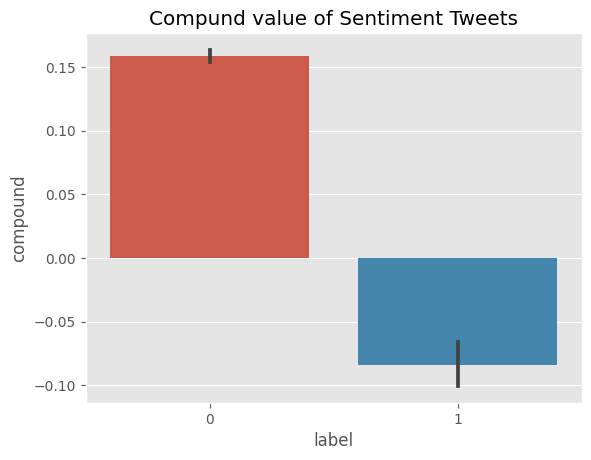

In [27]:
ax = sns.barplot(data=vaders,x='label',y='compound')
ax.set_title('Compund value of Sentiment Tweets')
plt.show()

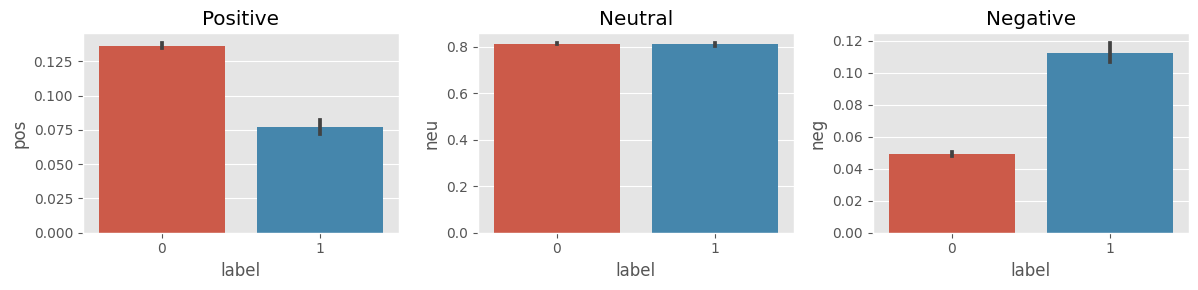

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='label', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='label', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='label', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

***Roberta Pretrained Model***

In [29]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [30]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [31]:
#VADER results on examples
print(example)
sia.polarity_scores(example)

#abc2020 getting ready 2 remove the victums frm #pulseclub #prayfororlando  


{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.3612}

In [32]:
#Run for ROBERTA model
encoded_text = tokenizer(example,return_tensors='pt')

In [33]:
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.05257426, 'roberta_neu': 0.7459044, 'roberta_pos': 0.20152128}


In [34]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [36]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['tweet']
        myid = row['id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/31962 [00:00<?, ?it/s]

In [37]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = results_df.merge(df, how='left')

In [38]:
results_df.head(1)

,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,label,tweet
0,1,0.385,0.615,0.0,-0.8296,0.930986,0.063312,0.005702,0,@user when a father is dysfunctional and is s...


***Compare Sores Between Models***

In [39]:
results_df.columns

Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'label', 'tweet'],
      dtype='object')

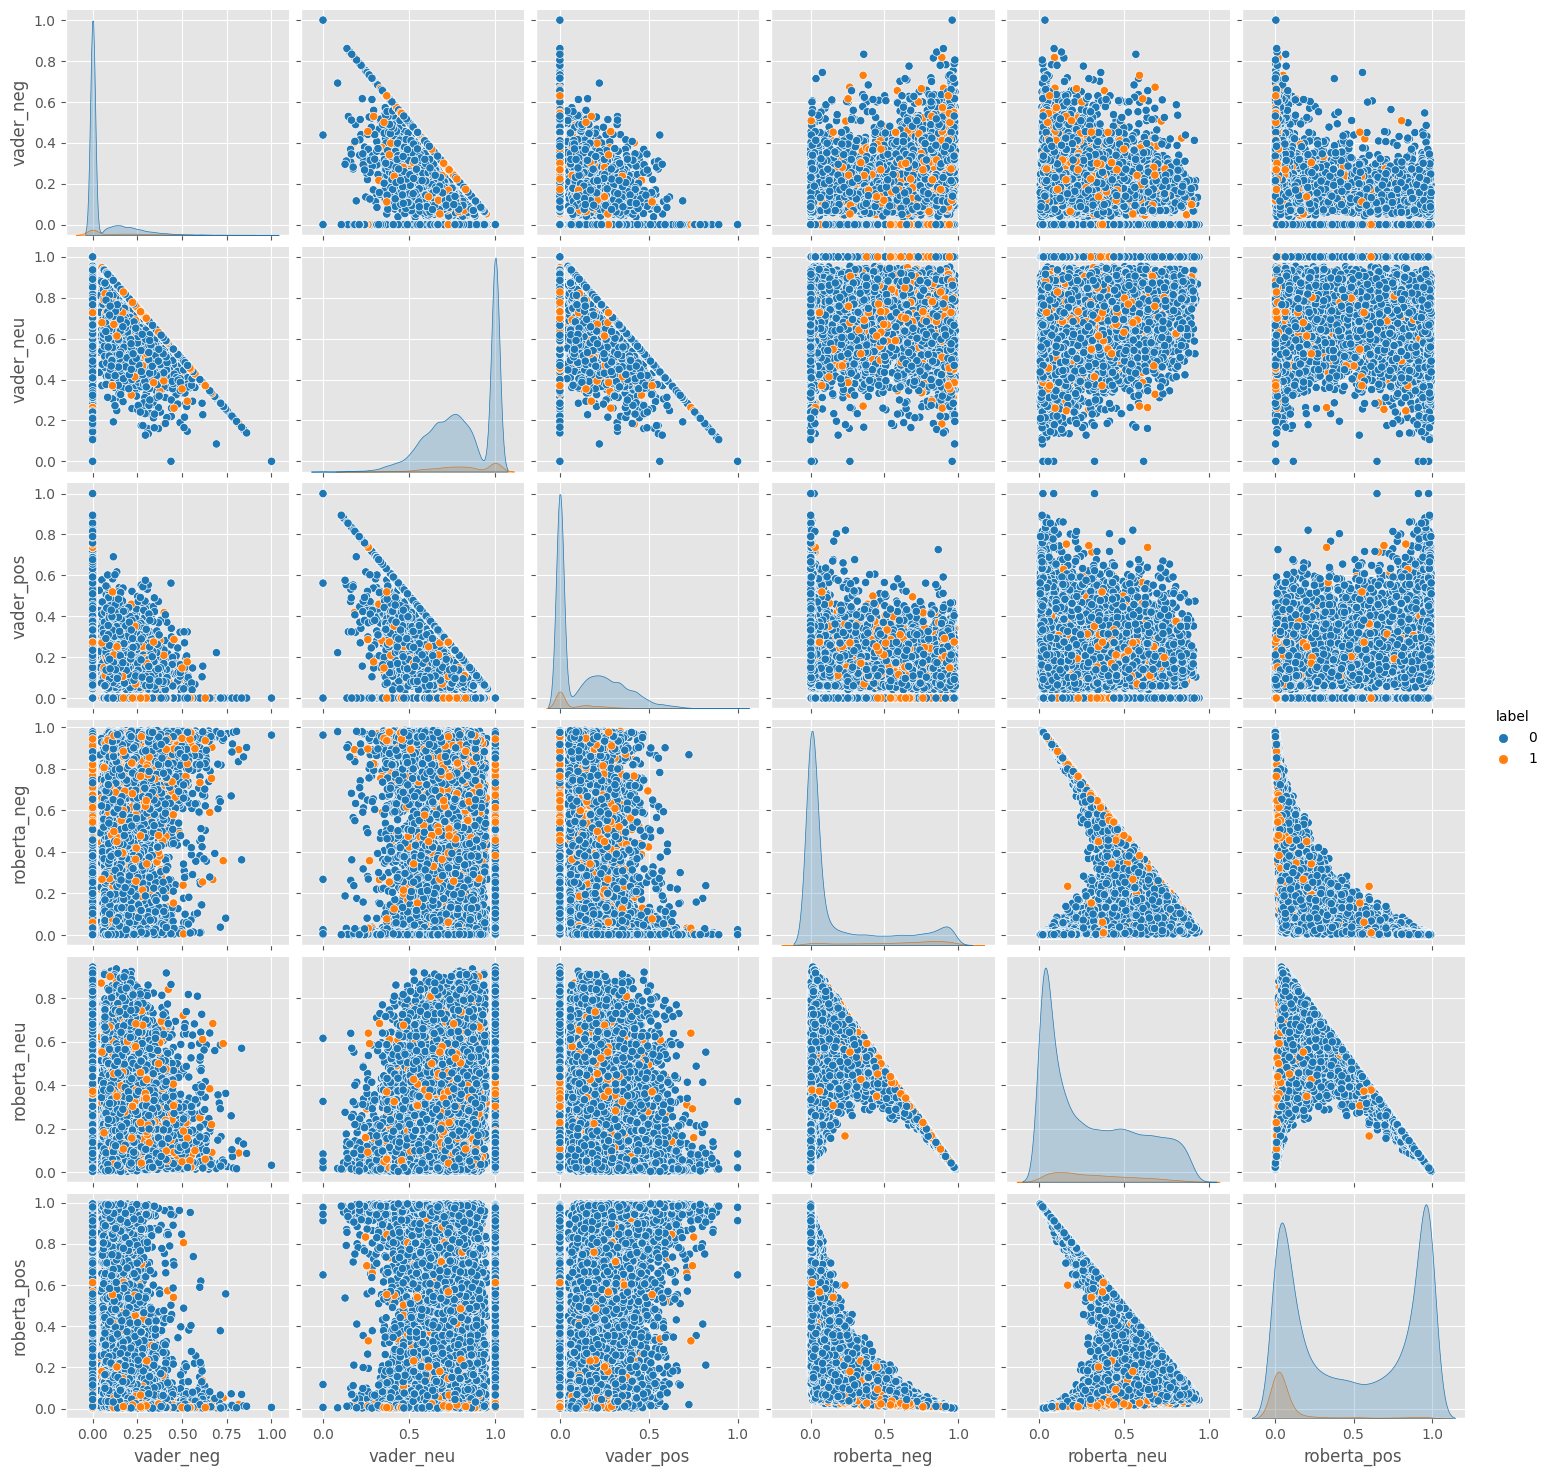

In [41]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='label',
            palette='tab10')
plt.show()

In [43]:
results_df.query('label == 0') \
    .sort_values('roberta_pos', ascending=False)['tweet'].values[0]

"thank you @user for my warm welcome this morning. i enjoyed hearing about sip's for next year. can't wait!  "

In [44]:
results_df.query('label == 0') \
    .sort_values('vader_pos', ascending=False)['tweet'].values[0]

'tolerance, love, kindness.     '

In [45]:
#negative sentiment 5 star review
results_df.query('label == 1')\
.sort_values('roberta_neg', ascending = False)['tweet'].values[0]

'@user  how do you sleep at night? you are a terrible person! you sir represent everything  wrong with our country. gfy '

In [46]:
results_df.query('label == 1')\
.sort_values('vader_neg', ascending = False)['tweet'].values[0]

'lame duck and lame dick '

In [47]:
from transformers import pipeline
sent_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [48]:
sent_pipeline('I love this life')

[{'label': 'POSITIVE', 'score': 0.9998776912689209}]

In [49]:
polarity_scores_roberta('I love this life')

{'roberta_neg': 0.007152511,
 'roberta_neu': 0.015908107,
 'roberta_pos': 0.9769394}

In [50]:
sia.polarity_scores('I love this life')

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}